In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
pd.set_option('display.max_columns', None)

In [2]:
train_users_data=pd.read_csv("C://Users/ksnss/Downloads/train_users_2.csv.zip")
test_users_data=pd.read_csv("C://Users/ksnss/Downloads/test_users.csv.zip")
sessions_data=pd.read_csv("C://Users/ksnss/Downloads/sessions.csv.zip")
countries_data=pd.read_csv("C://Users/ksnss/Downloads/countries.csv.zip")
age_gender_bkts_data=pd.read_csv("C://Users/ksnss/Downloads/age_gender_bkts.csv.zip")

In [3]:
train_users_data['date_account_created']=pd.to_datetime(train_users_data['date_account_created'])
train_users_data['timestamp_first_active']=pd.to_datetime(train_users_data['timestamp_first_active']//1000000,format='%Y%m%d')
train_users_data.loc[(train_users_data['gender']=='-unknown-'),'gender']='NotSpecified'
train_users_data['first_affiliate_tracked'].fillna('No data',inplace=True)
test_users_data['date_account_created']=pd.to_datetime(test_users_data['date_account_created'])
test_users_data['timestamp_first_active']=pd.to_datetime(test_users_data['timestamp_first_active']//1000000,format='%Y%m%d')
test_users_data.loc[(test_users_data['gender']=='-unknown-'),'gender']='NotSpecified'
test_users_data['first_affiliate_tracked'].fillna('No data',inplace=True)
train_users_data['Year_Account_Created']=pd.DatetimeIndex(train_users_data['date_account_created']).year
train_users_data['Month_Account_Created']=pd.DatetimeIndex(train_users_data['date_account_created']).month
train_users_data['Day_Account_Created']=pd.DatetimeIndex(train_users_data['date_account_created']).day
train_users_data['Year_Timestamp_FirstActive']=pd.DatetimeIndex(train_users_data['timestamp_first_active']).year
train_users_data['Month_Timestamp_FirstActive']=pd.DatetimeIndex(train_users_data['timestamp_first_active']).month
train_users_data['Day_Timestamp_FirstActive']=pd.DatetimeIndex(train_users_data['timestamp_first_active']).day
train_users_data['days_difference_account']=train_users_data['date_account_created']-train_users_data['timestamp_first_active']
train_users_data['days_difference_account'] = pd.to_numeric(train_users_data['days_difference_account'].dt.days, downcast='integer')
train_users_data.loc[(train_users_data['age']>=15) & (train_users_data['age']<=19),'Age_Range']='15-19'
train_users_data.loc[(train_users_data['age']>20) & (train_users_data['age']<=24),'Age_Range']='20-24'
train_users_data.loc[(train_users_data['age']>25) & (train_users_data['age']<=29),'Age_Range']='25-29'
train_users_data.loc[(train_users_data['age']>30) & (train_users_data['age']<=34),'Age_Range']='30-34'
train_users_data.loc[(train_users_data['age']>35) & (train_users_data['age']<=39),'Age_Range']='35-39'
train_users_data.loc[(train_users_data['age']>40) & (train_users_data['age']<=44),'Age_Range']='40-44'
train_users_data.loc[(train_users_data['age']>45) & (train_users_data['age']<=49),'Age_Range']='45-49'
train_users_data.loc[(train_users_data['age']>50) & (train_users_data['age']<=54),'Age_Range']='50-54'
train_users_data.loc[(train_users_data['age']>55) & (train_users_data['age']<=59),'Age_Range']='55-59'
train_users_data.loc[(train_users_data['age']>60) & (train_users_data['age']<=64),'Age_Range']='60-64'
train_users_data.loc[(train_users_data['age']>65) & (train_users_data['age']<=69),'Age_Range']='65-69'
train_users_data.loc[(train_users_data['age']>70) & (train_users_data['age']<=74),'Age_Range']='70-74'
train_users_data.loc[(train_users_data['age']>75) & (train_users_data['age']<=79),'Age_Range']='75-79'
train_users_data.loc[(train_users_data['age']>80) & (train_users_data['age']<=84),'Age_Range']='80-84'
train_users_data.loc[(train_users_data['age']>85) & (train_users_data['age']<=89),'Age_Range']='85-89'
train_users_data.loc[(train_users_data['age']>1900) & (train_users_data['age']<=1999),'age']=train_users_data['Year_Timestamp_FirstActive']-train_users_data['age']
train_users_data.loc[(train_users_data['age']<15) & (train_users_data['age']>=90),'Age_Range']='5-10'
train_users_data['Age_Range'].fillna('11-15',inplace=True)
test_users_data['Year_Account_Created']=pd.DatetimeIndex(test_users_data['date_account_created']).year
test_users_data['Month_Account_Created']=pd.DatetimeIndex(test_users_data['date_account_created']).month
test_users_data['Day_Account_Created']=pd.DatetimeIndex(test_users_data['date_account_created']).day
test_users_data['Year_Timestamp_FirstActive']=pd.DatetimeIndex(test_users_data['timestamp_first_active']).year
test_users_data['Month_Timestamp_FirstActive']=pd.DatetimeIndex(test_users_data['timestamp_first_active']).month
test_users_data['Day_Timestamp_FirstActive']=pd.DatetimeIndex(test_users_data['timestamp_first_active']).day
test_users_data['days_difference_account']=test_users_data['date_account_created']-test_users_data['timestamp_first_active']
test_users_data['days_difference_account'] = pd.to_numeric(test_users_data['days_difference_account'].dt.days, downcast='integer')
test_users_data.loc[(test_users_data['age']>=15) & (test_users_data['age']<=19),'Age_Range']='15-19'
test_users_data.loc[(test_users_data['age']>20) & (test_users_data['age']<=24),'Age_Range']='20-24'
test_users_data.loc[(test_users_data['age']>25) & (test_users_data['age']<=29),'Age_Range']='25-29'
test_users_data.loc[(test_users_data['age']>30) & (test_users_data['age']<=34),'Age_Range']='30-34'
test_users_data.loc[(test_users_data['age']>35) & (test_users_data['age']<=39),'Age_Range']='35-39'
test_users_data.loc[(test_users_data['age']>40) & (test_users_data['age']<=44),'Age_Range']='40-44'
test_users_data.loc[(test_users_data['age']>45) & (test_users_data['age']<=49),'Age_Range']='45-49'
test_users_data.loc[(test_users_data['age']>50) & (test_users_data['age']<=54),'Age_Range']='50-54'
test_users_data.loc[(test_users_data['age']>55) & (test_users_data['age']<=59),'Age_Range']='55-59'
test_users_data.loc[(test_users_data['age']>60) & (test_users_data['age']<=64),'Age_Range']='60-64'
test_users_data.loc[(test_users_data['age']>65) & (test_users_data['age']<=69),'Age_Range']='65-69'
test_users_data.loc[(test_users_data['age']>70) & (test_users_data['age']<=74),'Age_Range']='70-74'
test_users_data.loc[(test_users_data['age']>75) & (test_users_data['age']<=79),'Age_Range']='75-79'
test_users_data.loc[(test_users_data['age']>80) & (test_users_data['age']<=84),'Age_Range']='80-84'
test_users_data.loc[(test_users_data['age']>85) & (test_users_data['age']<=89),'Age_Range']='85-89'
test_users_data.loc[(test_users_data['age']>1900) & (test_users_data['age']<=1999),'age']=test_users_data['Year_Timestamp_FirstActive']-test_users_data['age']
test_users_data.loc[(test_users_data['age']<15) & (test_users_data['age']>=90),'Age_Range']='5-10'
test_users_data['Age_Range'].fillna('11-15',inplace=True)
test_users_data.drop(columns=['date_first_booking','age','id'],inplace=True)
target_train=train_users_data['country_destination']
train_users_data.drop(columns=['date_first_booking','age','id','country_destination','date_account_created','timestamp_first_active'],inplace=True)

In [4]:
train_users_data

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,Year_Account_Created,Month_Account_Created,Day_Account_Created,Year_Timestamp_FirstActive,Month_Timestamp_FirstActive,Day_Timestamp_FirstActive,days_difference_account,Age_Range
0,NotSpecified,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,2009,3,19,466,11-15
1,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2009,5,23,732,35-39
2,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,2009,6,9,476,55-59
3,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,2009,10,31,765,40-44
4,NotSpecified,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,2009,12,8,280,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,MALE,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,6,30,2014,6,30,0,30-34
213447,NotSpecified,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2014,6,30,2014,6,30,0,11-15
213448,NotSpecified,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2014,6,30,2014,6,30,0,30-34
213449,NotSpecified,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,2014,6,30,2014,6,30,0,11-15


In [5]:
test_users_data.drop(columns=['date_account_created','timestamp_first_active'],inplace=True)
test_users_data

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,Year_Account_Created,Month_Account_Created,Day_Account_Created,Year_Timestamp_FirstActive,Month_Timestamp_FirstActive,Day_Timestamp_FirstActive,days_difference_account,Age_Range
0,FEMALE,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014,7,1,2014,7,1,0,11-15
1,NotSpecified,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014,7,1,2014,7,1,0,11-15
2,NotSpecified,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2014,7,1,2014,7,1,0,11-15
3,NotSpecified,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,2014,7,1,2014,7,1,0,11-15
4,NotSpecified,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,2014,7,1,2014,7,1,0,11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,NotSpecified,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2014,9,30,2014,9,30,0,30-34
62092,NotSpecified,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2014,9,30,2014,9,30,0,11-15
62093,NotSpecified,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2014,9,30,2014,9,30,0,11-15
62094,NotSpecified,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,9,30,2014,9,30,0,11-15


In [6]:
data=train_users_data.append(test_users_data,ignore_index=True)
data

,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,Year_Account_Created,Month_Account_Created,Day_Account_Created,Year_Timestamp_FirstActive,Month_Timestamp_FirstActive,Day_Timestamp_FirstActive,days_difference_account,Age_Range
0,NotSpecified,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,2009,3,19,466,11-15
1,MALE,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2009,5,23,732,35-39
2,FEMALE,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,2009,6,9,476,55-59
3,FEMALE,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,2009,10,31,765,40-44
4,NotSpecified,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,2009,12,8,280,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,NotSpecified,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2014,9,30,2014,9,30,0,30-34
275543,NotSpecified,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2014,9,30,2014,9,30,0,11-15
275544,NotSpecified,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2014,9,30,2014,9,30,0,11-15
275545,NotSpecified,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,9,30,2014,9,30,0,11-15


In [7]:

cat_columns=['gender','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser','Age_Range']
td=pd.get_dummies(data,columns=cat_columns)
td

,signup_flow,Year_Account_Created,Month_Account_Created,Day_Account_Created,Year_Timestamp_FirstActive,Month_Timestamp_FirstActive,Day_Timestamp_FirstActive,days_difference_account,gender_FEMALE,gender_MALE,gender_NotSpecified,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,language_-unknown-,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_No data,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IBrowse,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_Nintendo Browser,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,Age_Range_11-15,Age_Range_15-19,Age_Range_20-24,Age_Range_25-29,Age_Range_30-34,Age_Range_35-39,Age_Range_40-44,Age_Range_45-49,Age_Range_50-54,Age_Range_55-59,Age_Range_60-64,Age_Range_65-69,Age_Range_70-74,Age_Range_75-79,Age_Range_80-84,Age_Range_85-89
0,0,2010,6,28,2009,3,19,466,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2011,5,25,2009,5,23,732,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
train=td[:213451]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target_train, test_size=0.33, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
fclf=RandomForestClassifier(n_estimators=100,n_jobs=-1)
fclf.fit(X_train, y_train)
print('Base model accuracy is on training data is :',fclf.score(X_train, y_train))
print('Base model accuracy is on test data is :',fclf.score(X_test, y_test))

Base model accuracy is on training data is : 0.9363270215086846
Base model accuracy is on test data is : 0.5733613481168103


In [10]:
rc=RandomForestClassifier(n_estimators=200,n_jobs=-1)
rc.fit(X_train, y_train)
print('Base model accuracy is on training data is :',rc.score(X_train, y_train))
print('Base model accuracy is on test data is :',rc.score(X_test, y_test))

Base model accuracy is on training data is : 0.9363410063491175
Base model accuracy is on test data is : 0.5735884950098666


In [11]:
rc1=RandomForestClassifier(n_estimators=300,n_jobs=-1)
rc1.fit(X_train, y_train)
print('Base model accuracy is on training data is :',rc1.score(X_train, y_train))
print('Base model accuracy is on test data is :',rc1.score(X_test, y_test))

Base model accuracy is on training data is : 0.9363479987693341
Base model accuracy is on test data is : 0.5734891182441545


In [12]:
rc1=RandomForestClassifier(n_estimators=700,n_jobs=-1)
rc1.fit(X_train, y_train)
print('Base model accuracy is on training data is :',rc1.score(X_train, y_train))
print('Base model accuracy is on test data is :',rc1.score(X_test, y_test))

Base model accuracy is on training data is : 0.9363479987693341
Base model accuracy is on test data is : 0.5741989522849558


In [13]:
from sklearn.metrics import classification_report
ypred=rc1.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       182
          CA       0.01      0.00      0.00       456
          DE       0.00      0.00      0.00       358
          ES       0.03      0.01      0.01       743
          FR       0.03      0.01      0.02      1645
          GB       0.02      0.00      0.01       837
          IT       0.02      0.01      0.01       952
         NDF       0.66      0.78      0.72     40905
          NL       0.00      0.00      0.00       241
          PT       0.00      0.00      0.00        86
          US       0.43      0.40      0.41     20714
       other       0.06      0.02      0.03      3320

    accuracy                           0.57     70439
   macro avg       0.10      0.10      0.10     70439
weighted avg       0.51      0.57      0.54     70439



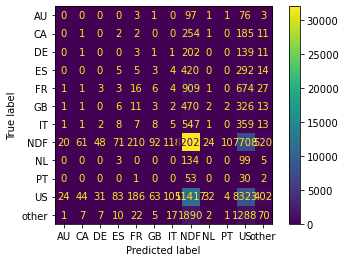

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cf=confusion_matrix(y_test,ypred)
plot_confusion_matrix(rc1, X_test, y_test)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'n_estimators':[800,1000,1200]}
rs=RandomizedSearchCV(RandomForestClassifier(),param_distributions =param_grid,n_iter = 7,cv = 3, verbose=2, random_state=42, n_jobs = -1 )
rs.fit(X_train, y_train)
rs.best_params_

C:\Users\ksnss\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=7. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\ksnss\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


{'n_estimators': 800}

In [15]:
rs.best_estimator_.score(X_test,y_test)

0.5747526228367807

In [16]:
predict_data=td[213451:]

out=rs.best_estimator_.predict(predict_data)
out

array(['NDF', 'NDF', 'NDF', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

In [23]:
test=td[213452:]
test

,signup_flow,Year_Account_Created,Month_Account_Created,Day_Account_Created,Year_Timestamp_FirstActive,Month_Timestamp_FirstActive,Day_Timestamp_FirstActive,days_difference_account,gender_FEMALE,gender_MALE,gender_NotSpecified,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,language_-unknown-,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_No data,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IBrowse,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_Nintendo Browser,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,Age_Range_11-15,Age_Range_15-19,Age_Range_20-24,Age_Range_25-29,Age_Range_30-34,Age_Range_35-39,Age_Range_40-44,Age_Range_45-49,Age_Range_50-54,Age_Range_55-59,Age_Range_60-64,Age_Range_65-69,Age_Range_70-74,Age_Range_75-79,Age_Range_80-84,Age_Range_85-89
213452,0,2014,7,1,2014,7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213453,0,2014,7,1,2014,7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [24]:
test['country_destination']=out

<ipython-input-24-a59d085bb819>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['country_destination']=out


In [17]:
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
#random_grid = {'n_estimators': n_estimators}

In [18]:
#from sklearn.model_selection import RandomizedSearchCV
#rf = RandomForestClassifier()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [19]:
#rf_random.fit(X_train, y_train)
#rf_random.best_params_

C:\Users\ksnss\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 